In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your enriched data
df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')

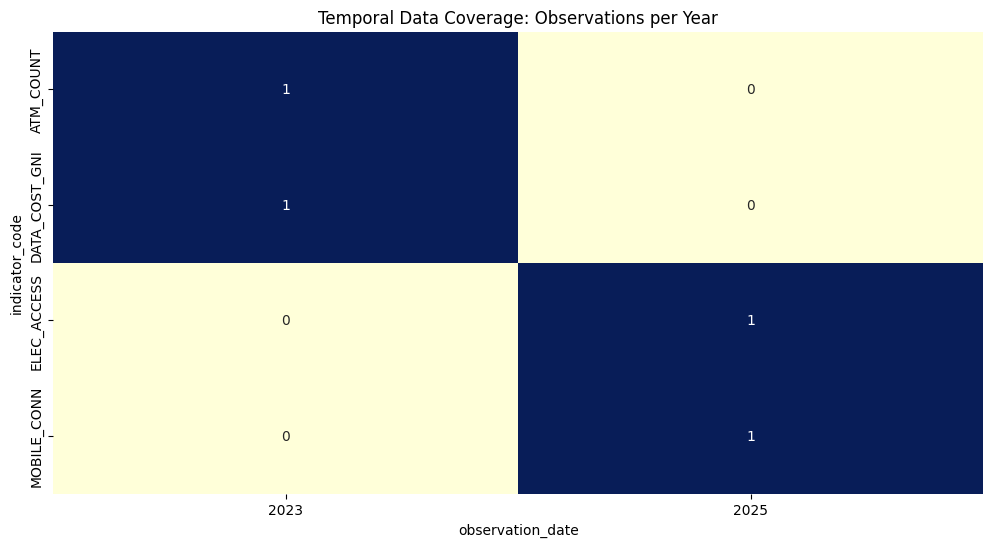

In [2]:
# Prepare data for temporal heatmap
pivot_df = df[df['record_type']=='observation'].pivot_table(
    index='indicator_code', 
    columns=pd.to_datetime(df['observation_date']).dt.year, 
    values='value_numeric', 
    aggfunc='count'
).fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Temporal Data Coverage: Observations per Year")
plt.show()

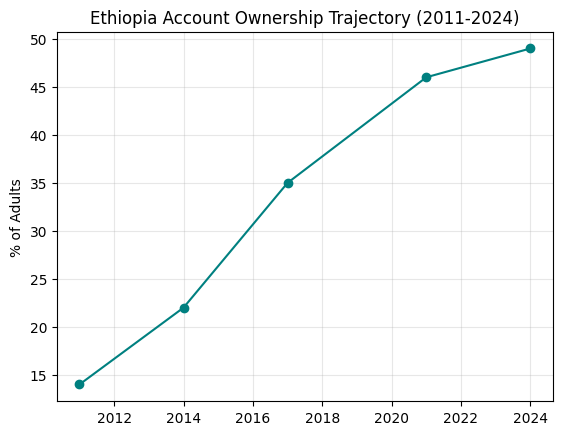

In [3]:
# Manually add the official trajectory from Page 3 if not in your CSV
trajectory = pd.DataFrame({
    'Year': [2011, 2014, 2017, 2021, 2024],
    'Account_Ownership': [14, 22, 35, 46, 49]
})

plt.plot(trajectory['Year'], trajectory['Account_Ownership'], marker='o', linestyle='-', color='teal')
plt.title("Ethiopia Account Ownership Trajectory (2011-2024)")
plt.ylabel("% of Adults")
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
import plotly.express as px

# Filter for events
events = df[df['record_type'] == 'event'].copy()

fig = px.scatter(events, x='observation_date', y=[0]*len(events), 
                 text='indicator', # or 'event_name'
                 title="Major Financial Inclusion Events in Ethiopia")
fig.update_traces(textposition='top center')
fig.show()

c:\Users\Her\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

c:\Users\Her\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered



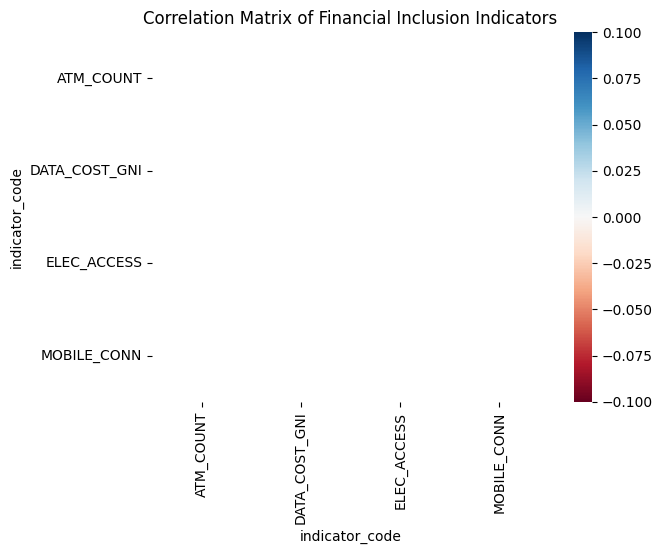

In [5]:
# Pivot observations to get a correlation matrix
corr_data = df[df['record_type']=='observation'].pivot_table(
    index='observation_date', columns='indicator_code', values='value_numeric'
).corr()

sns.heatmap(corr_data, annot=True, cmap='RdBu')
plt.title("Correlation Matrix of Financial Inclusion Indicators")
plt.show()

In [6]:
# Refined Event Timeline Code
events = df[df['record_type'] == 'event'].copy()
events['observation_date'] = pd.to_datetime(events['observation_date'])

fig = px.scatter(events, x='observation_date', y=[1]*len(events), 
                 text='indicator', size_max=60,
                 title="Key Financial Inclusion Events")
fig.update_traces(textposition='top center')
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

In [7]:
# Check event records
events_check = df[df['record_type'] == 'event']
print(f"Total events found: {len(events_check)}")
print("Sample observation_dates for events:")
print(events_check['observation_date'].unique())

Total events found: 0
Sample observation_dates for events:
[]


In [8]:
import pandas as pd
import plotly.express as px

# 1. Ensure dates are actual datetime objects
df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')

# 2. Filter for events and remove any that lack a date
events = df[df['record_type'] == 'event'].dropna(subset=['observation_date']).copy()

if len(events) > 0:
    # 3. Create a constant y-value so they appear on a single timeline
    events['y'] = 1 

    # 4. Plot
    fig = px.scatter(
        events, 
        x='observation_date', 
        y='y', 
        text='indicator', # This column usually contains the event name
        title="Major Financial Inclusion Events in Ethiopia",
        template="plotly_white"
    )

    # 5. Styling to make it look like a timeline
    fig.update_traces(
        textposition='top center', 
        marker=dict(size=15, color='darkblue', symbol='diamond')
    )
    fig.update_yaxes(visible=False, range=[0, 2])
    fig.update_xaxes(title="Year", showgrid=True)
    fig.show()
else:
    print("No events with valid dates were found. Check your CSV for empty 'observation_date' values in event rows.")

No events with valid dates were found. Check your CSV for empty 'observation_date' values in event rows.


In [9]:
import pandas as pd
import plotly.express as px

# 1. Load data
df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')

# 2. Define the dates mentioned in the Challenge PDF (Page 2, 9)
event_map = {
    'Telebirr': '2021-05-11',
    'Safaricom': '2022-10-06',
    'M-Pesa': '2023-08-15',
    'National Bank of Ethiopia': '2021-01-01' # Approximate for strategy launch
}

# 3. Apply dates to the 'event' records based on keywords in the 'indicator' column
def patch_dates(row):
    if row['record_type'] == 'event' and pd.isna(row['observation_date']):
        for key, date in event_map.items():
            if key.lower() in str(row['indicator']).lower():
                return date
    return row['observation_date']

df['observation_date'] = df.apply(patch_dates, axis=1)
df['observation_date'] = pd.to_datetime(df['observation_date'])

# 4. Save the patched version
df.to_csv('../data/raw/ethiopia_fi_unified_data.csv', index=False)

# 5. Filter and Plot
events = df[df['record_type'] == 'event'].dropna(subset=['observation_date'])
events['y'] = 1

fig = px.scatter(events, x='observation_date', y='y', text='indicator',
                 title="Patched Timeline of Key Financial Inclusion Events")
fig.update_traces(textposition='top center', marker=dict(size=12, color='red'))
fig.update_yaxes(visible=False)
fig.show()

C:\Users\Her\AppData\Local\Temp\ipykernel_17028\4179831769.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




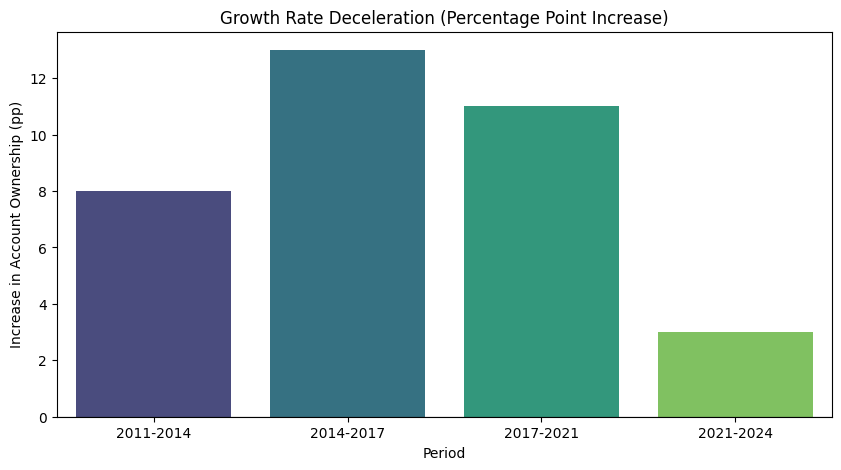

In [10]:
# Data from Page 3 of the PDF
growth_data = pd.DataFrame({
    'Period': ['2011-2014', '2014-2017', '2017-2021', '2021-2024'],
    'PP_Increase': [8, 13, 11, 3] # These are the '+pp' values from the table
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Period', y='PP_Increase', data=growth_data, palette='viridis')
plt.title("Growth Rate Deceleration (Percentage Point Increase)")
plt.ylabel("Increase in Account Ownership (pp)")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

C:\Users\Her\AppData\Local\Temp\ipykernel_17028\703472024.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




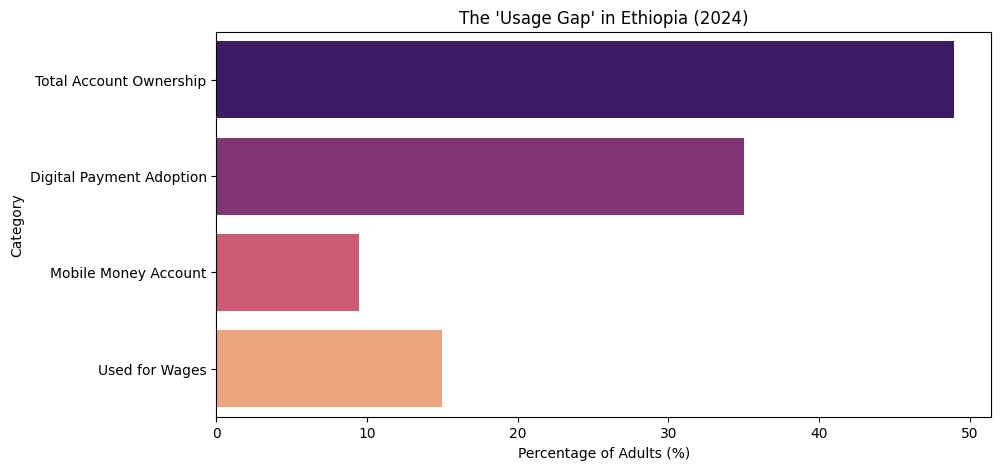

In [11]:
usage_vs_access = pd.DataFrame({
    'Category': ['Total Account Ownership', 'Digital Payment Adoption', 'Mobile Money Account', 'Used for Wages'],
    'Percentage': [49, 35, 9.45, 15] # Values from Page 3
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Percentage', y='Category', data=usage_vs_access, palette='magma')
plt.title("The 'Usage Gap' in Ethiopia (2024)")
plt.xlabel("Percentage of Adults (%)")
plt.show()